<a href="https://colab.research.google.com/github/adalves-ufabc/2025.Q3-PLN/blob/main/2025_Q3_PLN_AULA_13_Notebook_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2025-Q3]**
Prof. Alexandre Donizeti Alves

## **API Cohere**
---



**Cohere** é uma empresa de IA especializada em fornecer soluções de PLN. Fundada em 2019 por ex-cientistas do Google, a empresa está sediada em Toronto, Canadá.

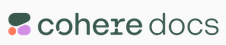

https://docs.cohere.com/

In [1]:
#@title Instalando a biblioteca da API Cohere
!pip install -q -U cohere

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.3/303.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 39.4 MB/s eta 0:00:00


In [2]:
#@title Versão da API Cohere

import cohere

print(cohere.__version__)

5.20.0


In [3]:
#@title Definindo a chave da API

from getpass import getpass

COHERE_API_KEY = getpass()

··········


In [4]:
#@title Teste

import cohere

cliente = cohere.ClientV2(api_key = COHERE_API_KEY)

resposta = cliente.chat(
  model = "command-a-03-2025",
  messages=[
        {
            "role": "user",
            "content": "Qual a capital do Brasil? Responda apenas o nome.",
        }
    ],
  temperature = 0.5
)

print(resposta.message.content[0].text)

Brasília


In [5]:
#@title Formatando a resposta [Markdown]

from IPython.display import Markdown

Markdown(resposta.message.content[0].text)

Brasília

In [6]:
#@title Formatando a resposta [JSON]

import json

import json

def formatar_json(resposta):
    dados = json.loads(resposta.json())
    json_formatado = json.dumps(dados, indent=4, ensure_ascii=False)
    linhas = json_formatado.splitlines()
    for linha in linhas:
      print(linha)

In [7]:
formatar_json(resposta)

{
    "id": "beeed634-087e-47f5-8694-28fdb89d6a61",
    "finish_reason": "COMPLETE",
    "message": {
        "role": "assistant",
        "content": [
            {
                "type": "text",
                "text": "Brasília"
            }
        ]
    },
    "usage": {
        "billed_units": {
            "input_tokens": 12.0,
            "output_tokens": 2.0
        },
        "tokens": {
            "input_tokens": 507.0,
            "output_tokens": 4.0
        },
        "cached_tokens": 448.0
    }
}


In [8]:
resposta.dict()

{'id': 'beeed634-087e-47f5-8694-28fdb89d6a61',
 'finish_reason': 'COMPLETE',
 'message': {'role': 'assistant',
  'content': [{'type': 'text', 'text': 'Brasília'}]},
 'usage': {'billed_units': {'input_tokens': 12.0, 'output_tokens': 2.0},
  'tokens': {'input_tokens': 507.0, 'output_tokens': 4.0},
  'cached_tokens': 448.0}}

In [9]:
#@title Lista de Modelos

import cohere

cliente = cohere.ClientV2(api_key = COHERE_API_KEY)

resposta = cliente.models.list()

resposta

ListModelsResponse(models=[GetModelResponse(name='embed-english-light-v3.0', is_deprecated=None, endpoints=['embed', 'classify'], finetuned=False, context_length=512, tokenizer_url='https://storage.googleapis.com/cohere-public/tokenizers/embed-english-light-v3.0.json', default_endpoints=[], features=None), GetModelResponse(name='embed-multilingual-v2.0', is_deprecated=None, endpoints=['embed', 'classify'], finetuned=False, context_length=256, tokenizer_url='https://storage.googleapis.com/cohere-public/tokenizers/embed-multilingual-v2.0.json', default_endpoints=[], features=None), GetModelResponse(name='rerank-multilingual-v3.0', is_deprecated=None, endpoints=['rerank'], finetuned=False, context_length=4096, tokenizer_url='https://storage.googleapis.com/cohere-public/tokenizers/rerank-multilingual-v3.0.json', default_endpoints=[], features=None), GetModelResponse(name='command-a-03-2025', is_deprecated=None, endpoints=['chat'], finetuned=False, context_length=288000, tokenizer_url='http

In [10]:
modelos = resposta.models

for modelo in modelos:
  print(modelo.name)

embed-english-light-v3.0
embed-multilingual-v2.0
rerank-multilingual-v3.0
command-a-03-2025
command-a-reasoning-08-2025
embed-multilingual-light-v3.0-image
c4ai-aya-vision-32b
command-a-vision-07-2025
embed-english-light-v3.0-image
embed-english-v3.0-image
command-r-08-2024
command-r7b-arabic-02-2025
embed-english-v3.0
c4ai-aya-expanse-32b
command-r7b-12-2024
c4ai-aya-vision-8b
command-a-translate-08-2025
embed-multilingual-v3.0-image
embed-v4.0
c4ai-aya-expanse-8b


In [11]:
len(modelos)

20

**Conversas de Múltiplas Interações (*Multi-turn*)**

Uma única solicitação de chat pode englobar várias etapas de uma conversa, em que cada mensagem na lista de mensagens aparece na ordem em que foi enviada. O envio de múltiplas mensagens pode fornecer ao modelo o contexto necessário para gerar uma resposta.

In [12]:
import cohere

cliente = cohere.ClientV2(api_key = COHERE_API_KEY)

system_message = "Você responde de forma concisa, em cerca de 5 palavras ou menos."

resposta = cliente.chat(
    model="command-a-03-2025",
    messages=[
        {"role": "system", "content": system_message},
        {
            "role": "user",
            "content": "Escreva um título para uma postagem de blog sobre design de API. Exiba apenas o texto do título.",
        },
        {"role": "assistant", "content": "Projetando APIs perfeitas"},
        {
            "role": "user",
            "content": "Mais um sobre IA generativa.",
        },
    ],
)

print(resposta.message.content[0].text)

IA Generativa: Criando o Futuro


In [13]:
from IPython.display import Markdown

Markdown(resposta.message.content[0].text)

IA Generativa: Criando o Futuro

**Saída Estruturada**

In [14]:
import cohere

cliente = cohere.ClientV2(api_key = COHERE_API_KEY)

resposta = cliente.chat(
    model="command-a-03-2025",
    messages=[
        {
            "role": "user",
            "content": "Gere um JSON descrevendo uma pessoa, com os campos 'nome' e 'idade'.'",
        }
    ],
    response_format={"type": "json_object"},
)

print(resposta.message.content[0].text)

{"nome": "João Silva", "idade": 30}


In [16]:
import cohere

cliente = cohere.ClientV2(api_key = COHERE_API_KEY, log_warning_experimental_features=False)

resposta = cliente.chat(
    model="command-a-03-2025",
    messages=[
        {
            "role": "user",
            "content": "Gere um JSON descrevendo um livro, com os campos 'título', 'autor' e 'ano_de_publicação'.'",
        }
    ],
    response_format={
        "type": "json_object",
        "schema": {
            "type": "object",
            "properties": {
                "title": {"type": "string"},
                "author": {"type": "string"},
                "publication_year": {"type": "integer"},
            },
            "required": ["title", "author", "publication_year"],
        },
    },
)

print(resposta.message.content[0].text)

{"title":"1984","author":"George Orwell","publication_year":1949}


**Imagens**

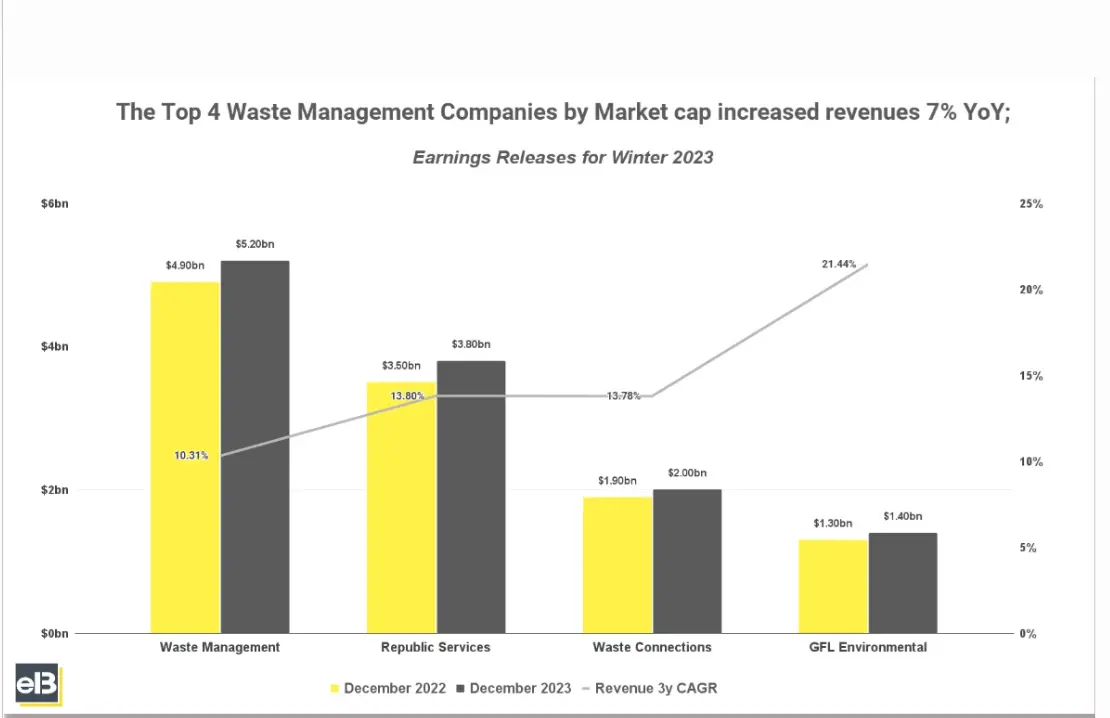

In [28]:
import cohere

cliente = cohere.ClientV2(api_key = COHERE_API_KEY)

imagem = {
    "type": "image_url",
    "image_url": {
        "url": "https://prod.ferndocs.com/_next/image?url=https%3A%2F%2Ffiles.buildwithfern.com%2Fcohere.docs.buildwithfern.com%2F2025-10-27T17%3A28%3A56.703Z%2Fassets%2Fimages%2Fwaste-management-request.png&w=3840&q=75"
    }
}

resposta = cliente.chat(
    model="command-a-vision-07-2025",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Please create two markdown tables. One for Revenue. One for Revenue 3y CAGR. the company names should be in alphabetical order in both."},
                imagem,
            ],
        }
    ],
)


In [30]:
from IPython.display import Markdown

Markdown(resposta.message.content[0].text)

Here are the two markdown tables you requested:

### Revenue

| Company           | December 2022 | December 2023 |
|-------------------|---------------|---------------|
| GFL Environmental | $1.30bn       | $1.40bn       |
| Republic Services | $3.50bn       | $3.80bn       |
| Waste Connections | $1.90bn       | $2.00bn       |
| Waste Management  | $4.90bn       | $5.20bn       |

### Revenue 3y CAGR

| Company           | Revenue 3y CAGR |
|-------------------|-----------------|
| GFL Environmental | 5%              |
| Republic Services | 15%             |
| Waste Connections | 18%             |
| Waste Management  | 21.44%          |

The companies are listed in alphabetical order in both tables. The Revenue table shows the revenue for each company in December 2022 and December 2023. The Revenue 3y CAGR table shows the three-year compound annual growth rate for each company's revenue.

A API de Chat permite que os usuários controlem o nível de "detalhe" da imagem enviada ao modelo, que pode ser `low`, `high` ou `auto` (valor default).

Um nível de detalhe menor ajuda a reduzir a quantidade total de tokens (e, portanto, o preço e a latência), mas pode resultar em um desempenho inferior. Recomendamos testar os dois níveis de detalhe para verificar se o desempenho é suficiente no nível `low`.

A propriedade de detalhe é especificada para cada imagem. Veja como fica:

In [33]:
resposta = cliente.chat(
  model="command-a-vision-07-2025",
  messages=[
	{ "role": "user", "content": [
            {"type": "text",
              "text": "O que tem nessa imagem?"
              },
            {"type": "image_url",
            "image_url": {
              "url": "https://cohere.com/favicon-32x32.png",
              "detail": "high"
          }
        },
      ]
    }
  ]
)


In [34]:
from IPython.display import Markdown

Markdown(resposta.message.content[0].text)

A imagem contém três formas geométricas simples. Há uma grande forma verde escuro na parte superior, que parece ser um retângulo arredondado ou um quadrado com cantos suaves. Abaixo disso, há duas formas menores: uma é um círculo laranja e a outra é um oval roxo. As formas estão dispostas em uma maneira que poderia ser interpretada como uma representação estilizada de um rosto, com a forma verde sendo o cabelo ou cabeça, o círculo laranja sendo o nariz e o oval roxo sendo a boca. No entanto, sem mais contexto, esta é apenas uma interpretação possível. As formas são apresentadas em um fundo branco, o que as torna bastante distintas e fácil de identificar.

**Referências**:

> https://docs.cohere.com/docs/the-cohere-platform

> https://docs.cohere.com/docs/chat-api

> https://docs.cohere.com/docs/structured-outputs

> https://docs.cohere.com/docs/image-inputs

